In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 20271 stars from Christlieb et al. (2008)

Total number of lines:  20465
Crossmatch with 1 result: 19576 objects
Crossmatch with 2 results: 443 objects
Crossmatch with 3 results: 1 objects
Crossmatch with 4 results: 0 objects
Crossmatch with 5 results: 0 objects


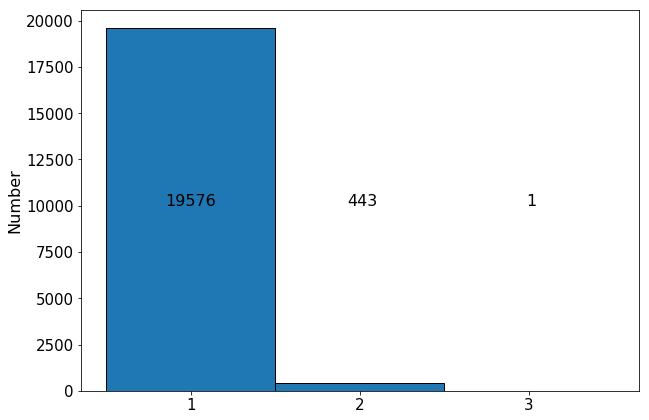

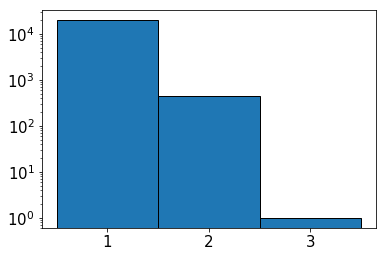

In [2]:
def count_hist(x):
    aa=0
    a=0
    b=0
    c=0
    d=0

    file = open(x,'r')
    lines = file.readlines()
    num = np.size(lines)         # for the total number of lines

    with open(x,'a') as f:
        f.write('\n\n\n\n\n\n')  # add a few blank lines at the end so i+[integer] is not out of range

    file = open(x,'r')
    lines = file.readlines()     # read lines in list

    for i in range(1,num):         # loop over all lines, from 1 because of header line
                                 # see if HE XXXX-XXXX is also in the following line; additional condition because 3 to 1 would also count as 2 to 1 otherwise
        if (lines[i][61:79] not in lines[i+1]) and (lines[i][61:79] not in lines[i-1]):
            aa=aa+1
        if (lines[i][61:79] in lines[i+1]) and (lines[i][61:79] not in lines[i+2][61:79]) and (lines[i][61:79] not in lines[i-1]):
            a=a+1
        if (lines[i][61:79] in lines[i+1]) and (lines[i][61:79] in lines[i+2]): # this condition is enough because there's no objects where 4 or more Gaia objects have been assigned
            b=b+1
        if (lines[i][61:79] in lines[i+1]) and (lines[i][61:79] in lines[i+2]) and (lines[i][61:79] in lines[i+3]):
            c=c+1
        if (lines[i][61:79] in lines[i+1]) and (lines[i][61:79] in lines[i+2]) and (lines[i][61:79] in lines[i+3]) and (lines[i][61:79] in lines[i+4]):
            d=d+1

    print('Total number of lines: ',num-1)     # -1 because of header line
    print('Crossmatch with 1 result: '+str(aa)+' objects')
    print('Crossmatch with 2 results: '+str(a)+' objects')
    print('Crossmatch with 3 results: '+str(b)+' objects')
    print('Crossmatch with 4 results: '+str(c)+' objects')
    print('Crossmatch with 5 results: '+str(d)+' objects')

    f = open(x,'r')
    lines1 = f.readlines()

    f = open(x,'w')
    for i in range(num):
        f.write(lines1[i])            # remove blank lines by overwriting the file with the same content, but only up to the number of lines initially counted
    f.close()
    
    
    x=np.ones(aa)                     # the number of objects that are assigned to 1,2,3,... Gaia objects are put into arrays
    y=np.ones(a)*2
    z=np.ones(b)*3
    zz=np.ones(c)*4

    bins=np.append(x,np.append(y,np.append(z,zz)))    # one array to contain them all
    
    if c==d==0 and a!=0 and b!=0:
        fig1=plt.figure(figsize=(10,7))
        plt.hist(bins,3,edgecolor='black')
        plt.xticks([4/3,2,8/3],['1','2','3'],size=15)
        plt.yticks(size=15)
        plt.text(4/3-0.1,10000,str(19576),size=16)
        plt.text(2-0.05,10000,str(443),size=16)
        plt.text(8/3-0.01,10000,str(1),size=16)
        plt.ylabel('Number',size=16)
        plt.show()

        fig2=plt.hist(bins,3,edgecolor='black')
        plt.xticks([4/3,2,8/3],['1','2','3'],size=15)
        plt.yticks(size=15)
        plt.yscale('log')
        plt.show()
        
    if c==d==b==0 and a!=0:
        fig1=plt.hist(bins,2,edgecolor='black')
        plt.xticks([1.25,1.75],['1','2'],size=15)
        plt.yticks(size=15)
        plt.show()

        fig2=plt.hist(bins,2,edgecolor='black')
        plt.xticks([1.25,1.75],['1','2'],size=15)
        plt.yticks(size=15)
        plt.yscale('log')
        plt.show()
        
    if c==d==b==a==0:
        fig1=plt.hist(bins,1,edgecolor='black')
        plt.xticks([1],['1'],size=15)
        plt.yticks(size=15)
        plt.show()

        fig2=plt.hist(bins,1,edgecolor='black')
        plt.xticks([1],['1'],size=15)
        plt.yticks(size=15)
        plt.yscale('log')
        plt.show()
    
count_hist('1590314000702A_2.dat')

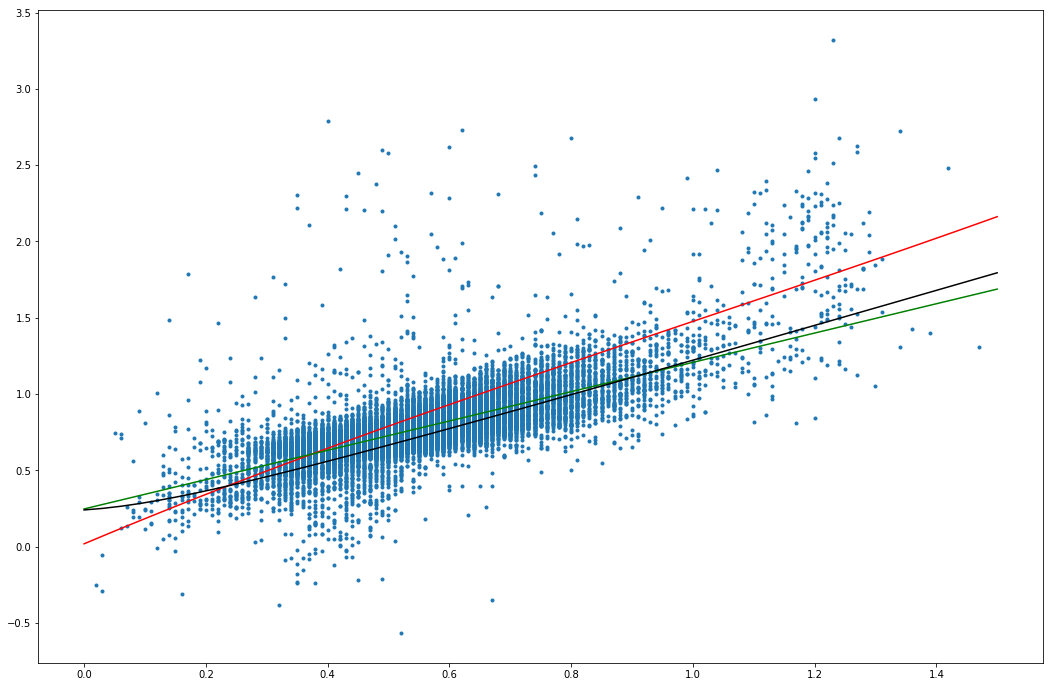

In [3]:
t=np.transpose(np.genfromtxt('1590314000702A_2.csv',skip_header=1,skip_footer=0,delimiter=','))

def func(x):
    return 0.0187 + 1.6814*x - 0.3357*x**2 + 0.1117*x**3

def fit(x):
    return 0.2473 + 0.9604*x

def transform(x):
    return np.sqrt(0.06779+0.1377*x+1.3262*x**2+0.01021*x**3)-0.01981

x = np.linspace(0,1.5)

plt.figure(figsize=(18,12))
plt.scatter(t[13] + t[12],t[56],marker='.')
plt.plot(x,func(x),color='red')
plt.plot(x,fit(x),color='green')
plt.plot(x,transform(x),color='black')

In [4]:
t=np.transpose(np.genfromtxt('1590314000702A_2.csv',skip_header=1,skip_footer=0,delimiter=','))

Bmag = t[11]                # Johnson B magnitude in mag
bp_rp = t[56]               # BP-RP colour index in mag
g = t[49]                   # G magnitude in mag
e_bp_rp = t[62]             # BP-RP colour excess
B_V_0 = t[13]               # Johnson B-V colour, dereddened
E_B_V = t[12]               # colour excess
B_V = B_V_0 + E_B_V         # Johnson B-V colour

B_V_gaia = np.array([])     
B_gaia = np.array([])

for i in range(np.size(t[0])):            # the formulas for the conversion used here are explained in the lab book
    if np.isnan(bp_rp[i]) == False:
        u=0.001768
        v=0.2297
        w=0.02385
        x=0.0147-0.00686*bp_rp[i]-0.1732*bp_rp[i]**2

        coeff=[u,v,w,x]
        y=np.roots(coeff)
        B_V_gaia = np.append(B_V_gaia,y[2])

        b = y[2]+g[i]+0.0176+0.00686*bp_rp[i]+0.1732*bp_rp[i]**2
        B_gaia= np.append(B_gaia,b)
    else:
        B_V_gaia = np.append(B_V_gaia,np.nan)
        B_gaia = np.append(B_gaia,np.nan)
        
B_V_gaia = np.real(B_V_gaia)
B_gaia = np.real(B_gaia)

In [5]:
l=0
for i in range(np.size(B_gaia)):          # check how many lines in bp_rp (and thus B_gaia, B_V_gaia) are NaN
    if np.isnan(bp_rp[i]) == True:
        l=l+1
        
print('Number of NaN lines:',l)


n=0
for i in range(np.size(B_V_0)):
    if B_V[i]-0.3 < B_V_gaia[i] and B_V[i]+0.3 > B_V_gaia[i] and Bmag[i]-0.6 < B_gaia[i] and Bmag[i]+0.6 > B_gaia[i]:
        n=n+1
    else:                                 # check how many Gaia objects are within a 3sigma range of the given B, B-V
        pass

arr3=np.array([])
for i in range(np.size(B_V_0)):
    if not (B_V[i]-0.3 < B_V_gaia[i] and B_V[i]+0.3 > B_V_gaia[i] and Bmag[i]-0.6 < B_gaia[i] and Bmag[i]+0.6 > B_gaia[i]):
        arr3=np.append(arr3,i)
    else:                                 # add the indices of the lines to this array to delete them later
        pass
    
arr3=arr3.astype('int')

print('Number of lines that are left:',n)

Number of NaN lines: 266
Number of lines that are left: 18373


Total number of lines:  18373
Crossmatch with 1 result: 18373 objects
Crossmatch with 2 results: 0 objects
Crossmatch with 3 results: 0 objects
Crossmatch with 4 results: 0 objects
Crossmatch with 5 results: 0 objects


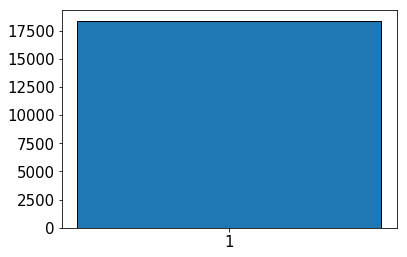

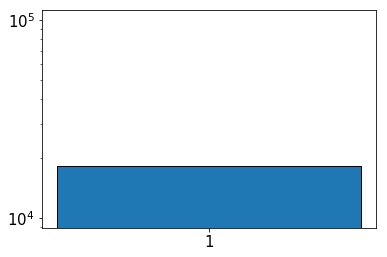

In [6]:
file = open('1590314000702A_2.dat','r')
lines = file.readlines()
num = np.size(lines)

newfile = open('plausibility_checked.dat','w')
for i in range(num):
    if i-1 in arr3:                    # write only lines where condition was fulfilled
        pass
    else:
        newfile.write(lines[i])
    
newfile.close()


file1 = open('1590314000702A_2.csv','r')    # dame thing for .csv
lines1 = file1.readlines()
num1 = np.size(lines1)

newfile1 = open('plausibility_checked.csv','w')
for i in range(num1):
    if i-1 in arr3:                    # write only lines where condition was fulfilled
        pass
    else:
        newfile1.write(lines1[i])
    
newfile1.close()

count_hist('plausibility_checked.dat')

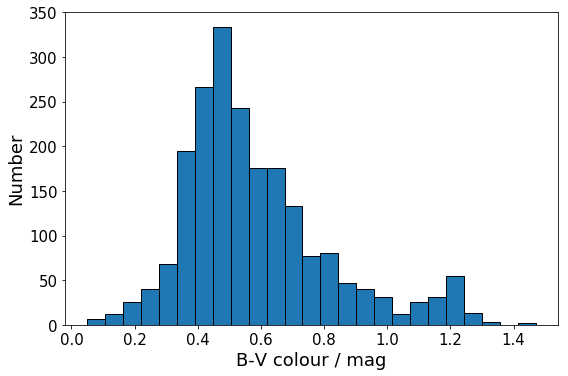

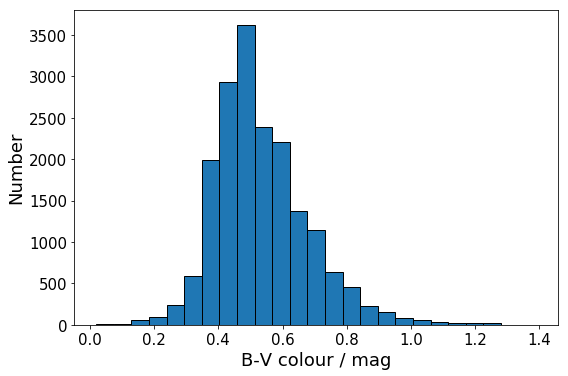

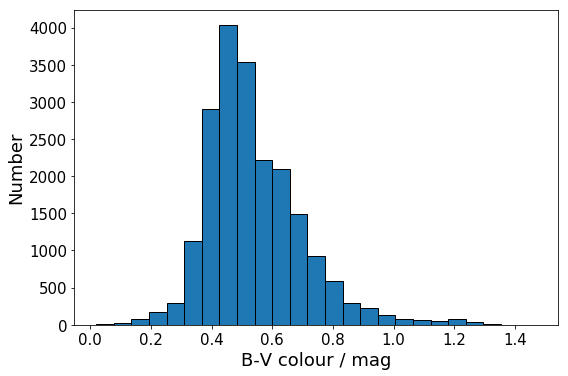

In [7]:
# statistical properties of removed stars

col_rem=np.array([])                          # B-V colours of HES not in 18095 chosen stars
for i in arr3:
    col_rem=np.append(col_rem,B_V[i])
    
col_stay=np.array([])
for i in range(np.size(Bmag)):
    if i not in arr3:
        col_stay=np.append(col_stay,B_V[i])
    else:
        pass
    
    
hist1=plt.figure(figsize=(8,16/3))
plt.hist(col_rem,25,edgecolor='black')
#plt.title('Histogram of colours of \'removed\' stars')
plt.xlabel('B-V colour / mag',size=18)
plt.ylabel('Number',size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.tight_layout()
plt.savefig('Abbildungen/02_2B_V_colours_removed.png')
plt.show()

hist2=plt.figure(figsize=(8,16/3))
plt.hist(col_stay,25,edgecolor='black')
#plt.title('Histogram of colours of 18373 stars')
plt.xlabel('B-V colour / mag',size=18)
plt.ylabel('Number',size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.tight_layout()
plt.show()

hist3=plt.figure(figsize=(8,16/3))
plt.hist(B_V,25,edgecolor='black')
#plt.title('Histogram of colours of 18373 stars')
plt.xlabel('B-V colour / mag',size=18)
plt.ylabel('Number',size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.tight_layout()
plt.savefig('Abbildungen/02_1B_V_colours_all.png')
plt.show()

In [8]:
f = open('plausibility_checked.dat','r')
g = open('zuordnung.dat','w')
h = open('list_of_objects_gaia_id.dat','w')

for line in f:
    g.write(line[51:80]+line[294:313]+'\n')          # Zuordnung mit IDs
    h.write(line[294:313]+'\n')                      # Liste mit nur den Gaia IDs
    
g.close()
h.close()

In [9]:
from astropy.io import ascii
test_input = 'plausibility_checked.csv'
text_file = ascii.read(test_input)
text_file.write('plausibility_checked.fits')

In [10]:
z=0
f=open('gaia_data_test','r')   # Überprüfung der Zuordnung Gaia-Gaia in topcat
for line in f:
    if line[24:43] in line[2:21]:
        z=z+1
        
print('Es sind '+str(z)+'/'+str(18373)+' Objekte mit gleicher source_id.')

Es sind 18373/18373 Objekte mit gleicher source_id.


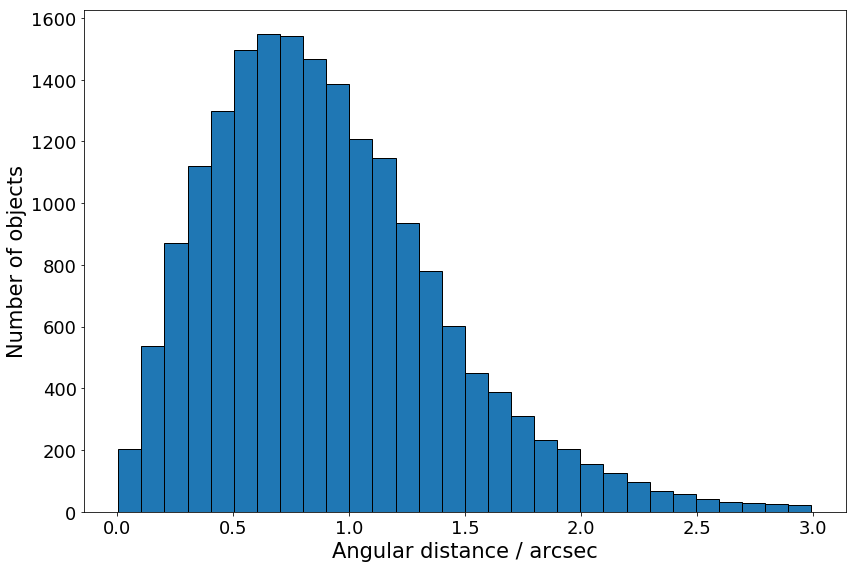

In [11]:
# histogram of the distances between object and matched object

dist = np.genfromtxt('plausibility_checked.csv',skip_header=1,delimiter=',',usecols=0)

plt.figure(figsize=(12,8))
plt.hist(dist,30,edgecolor='black')
plt.xticks(size=18)
plt.yticks(size=18)
#plt.title('Histogram of angular distances between object and matched object',size=20)
plt.xlabel('Angular distance / arcsec',size=21)
plt.ylabel('Number of objects',size=21)
plt.tight_layout()
plt.savefig('Abbildungen/angular_dist_crossmatch.png')

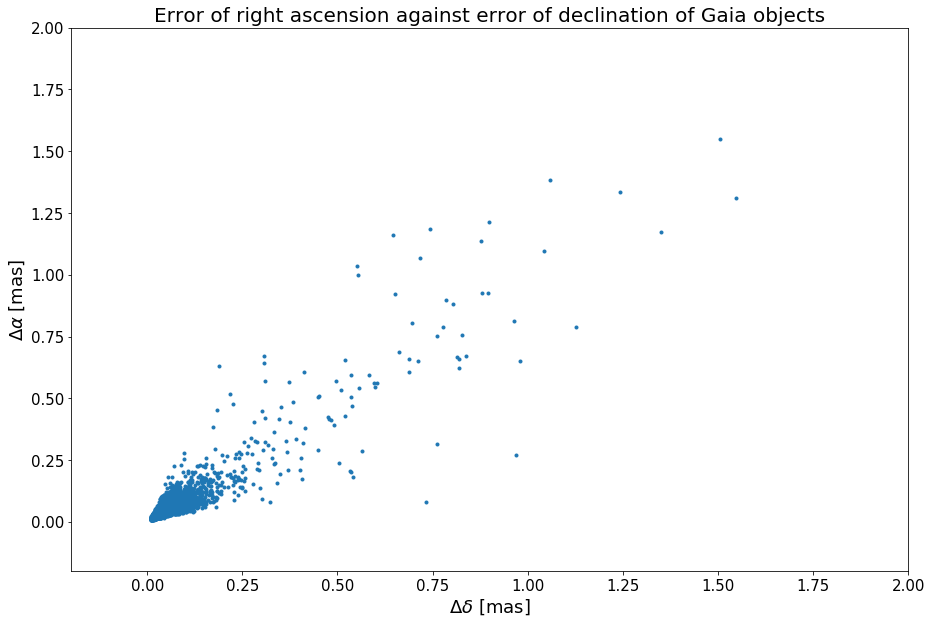

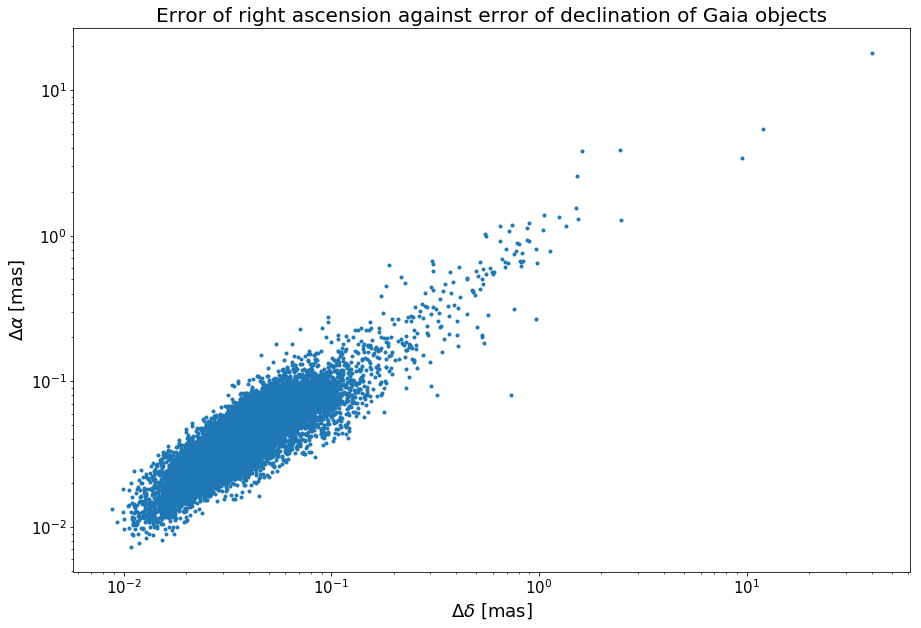

In [12]:
delta_coord = np.transpose(np.genfromtxt('gaia_data_csv',delimiter=',',skip_header=1,usecols=(36,38)))
# delta_coord[0] = \Delta\alpha ; delta_coord[1] = \Delta\delta

f1=plt.figure(figsize=(15,10))
plt.plot(delta_coord[1],delta_coord[0],linestyle='None',marker='.')
plt.xlabel(r'$\Delta\delta$ [mas]',size=18)
plt.ylabel(r'$\Delta\alpha$ [mas]',size=18)
plt.ylim(-0.2,2)
plt.xlim(-0.2,2)
plt.xticks(size=15)
plt.yticks(size=15)
plt.title('Error of right ascension against error of declination of Gaia objects',size=20)
plt.savefig('Abbildungen/delta_ra_vs_delta_dec_linear.png')

f2=plt.figure(figsize=(15,10))
plt.plot(delta_coord[1],delta_coord[0],linestyle='None',marker='.')
plt.xlabel(r'$\Delta\delta$ [mas]',size=18)
plt.ylabel(r'$\Delta\alpha$ [mas]',size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.yscale('log')
plt.xscale('log')
plt.title('Error of right ascension against error of declination of Gaia objects',size=20)
plt.savefig('Abbildungen/delta_ra_vs_delta_dec_log.png')

/usr/lib/python3/dist-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/lib/python3/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


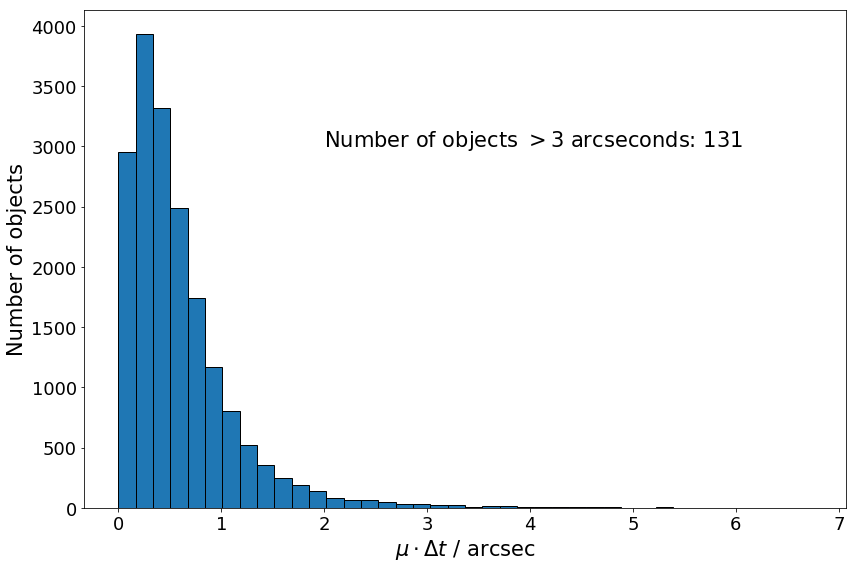

In [13]:
several = np.transpose(np.genfromtxt('gaia_data_csv',delimiter=',',skip_header=1,usecols=(34,37,42,43,44,45)))

epoch_gaia = several[0]
dec = several[1]               # in degrees
pmra = several[2]              # this and all following: in mas/yr
pmra_e = several[3]
pmdec = several[4]
pmdec_e = several[5]

pm = np.sqrt(pmra**2+pmdec**2*np.cos(dec*np.pi/180)**2)    # absolute value of proper motion in mas/yr


id_to_field = {}                                          # dictionary from HESid to the field it's in
fields=open('mphscan379fields_clean_fieldinfo.dat','r')
for line in fields:
    id_to_field[line[25:43]] = line[46:49]

field_to_epoch = {}                                       # dictionary which tells the epoch for a given field
epochs=open('DSSIepochs_south.dat','r')
for line in epochs:
    field_to_epoch[line[12:15]] = line[16:23]
    
    
full = pd.read_csv('gaia_data_csv')

epoch_dss1 = np.array([])                                 # here the epochs are saved
for i in range(18373):
    epoch_dss1 = np.append(epoch_dss1,field_to_epoch[id_to_field[full['HESid'][i]]])    # the HESid is taken with help from pandas directly from the same file as the other parameters, so the order is right 
    
epoch_dss1=epoch_dss1.astype('float')          # convert the strings to floats


final = pm*(epoch_gaia-epoch_dss1)/1000             # in arcseconds, that's why *1/1000


out=0
for i in range(18373):
    if final[i] >= 3:
        out=out+1
        
        
plt.figure(figsize=(12,8))
plt.hist(final,40,edgecolor='black')
plt.xticks(size=18)
plt.yticks(size=18)
#plt.title('Histogram of (proper motion)$\cdot$(epoch difference) of objects',size=20)
plt.xlabel('$\mu\cdot\Delta t$ / arcsec',size=21)
plt.ylabel('Number of objects',size=21)
plt.text(2,3000,'Number of objects $> 3$ arcseconds: '+str(out),size=21)
plt.tight_layout()
plt.savefig('Abbildungen/proper_motion_times_epoch_diff.png')

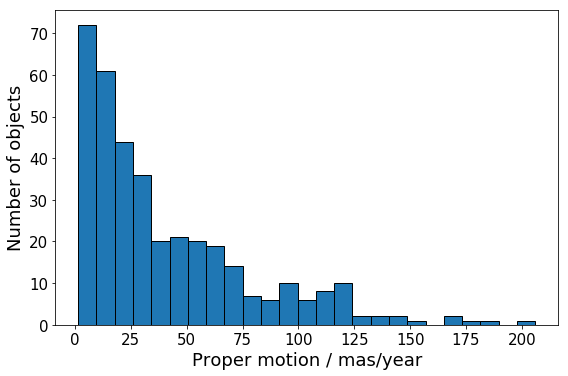

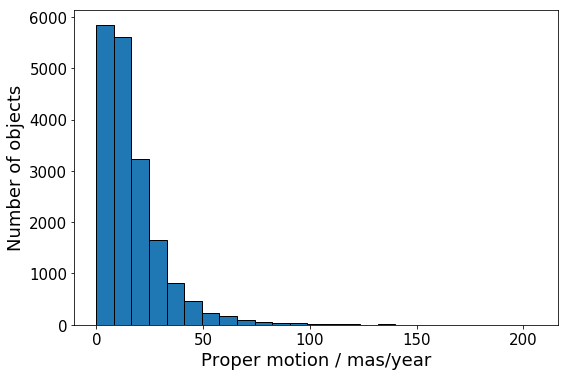

In [14]:
some_pm = np.array([])
for i in range(18373):
    if dist[i]>2.2:
        some_pm=np.append(some_pm,pm[i])
        
fig11=plt.figure(figsize=(8,16/3))
plt.hist(some_pm,25,edgecolor='black')
plt.xlabel('Proper motion / mas/year',size=18)
plt.ylabel('Number of objects',size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.tight_layout()
plt.savefig('Abbildungen/03_1pm_offshoots.png')
plt.show()

fig22=plt.figure(figsize=(8,16/3))
plt.hist(pm,25,edgecolor='black')
plt.xlabel('Proper motion / mas/year',size=18)
plt.ylabel('Number of objects',size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.tight_layout()
plt.savefig('Abbildungen/03_1pm_all.png')
plt.show()

In [15]:
# save table of first sample with interesting parameters

df = pd.read_csv (r'gaia_data_csv')

epoch = pd.DataFrame(data = epoch_dss1,columns=['DSSI_epoch'])

new = pd.concat([df['HE'],df['HESid'],df['source_id_cone'],df['_RAJ2000'],df['_DEJ2000'],epoch,df['ra_cone'],df['dec_cone'],df['ref_epoch'],df['angDist'],df['parallax_cone'],df['parallax_error_cone'],df['phot_g_mean_mag_cone'],df['bp_rp_cone']],axis=1)
new.to_csv('transitional_table1.csv',index=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future


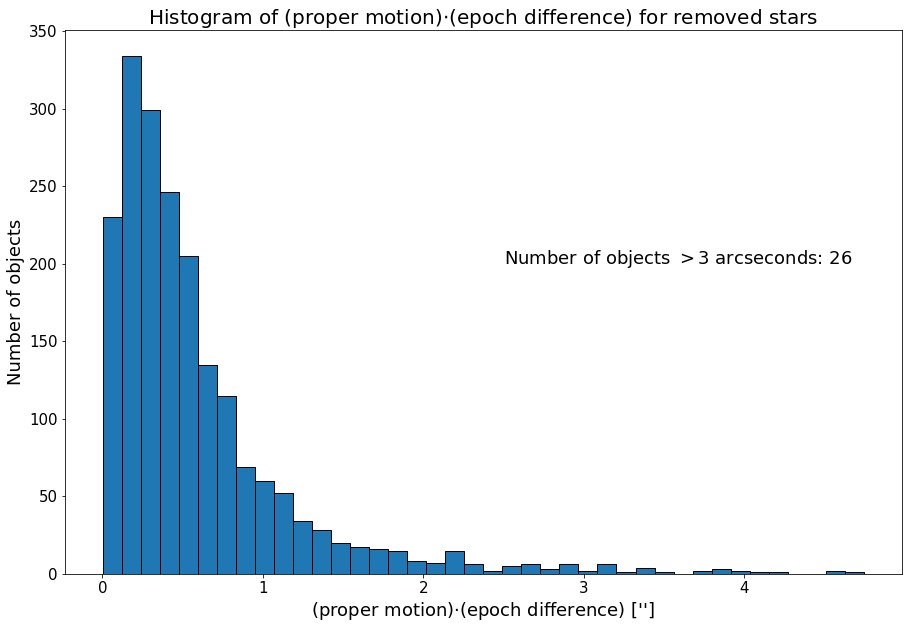

In [16]:
several = np.genfromtxt('1590314000702A_2.csv',delimiter=',',skip_header=1,usecols=(38,42,43,44,45))

arr4 = np.array([])
for i in range(np.size(Bmag)):
    if i  not in arr3:
        arr4 = np.append(arr4,i)
        
several = np.transpose(np.delete(several,arr4,0))

epoch_gaia = 2015.5
dec = several[0]               # in degrees
pmra = several[1]              # this and all following: in mas/yr
pmra_e = several[2]
pmdec = several[3]
pmdec_e = several[4]

pm = np.sqrt(pmra**2+pmdec**2*np.cos(dec*np.pi/180)**2)    # absolute value of proper motion in mas/yr


id_to_field = {}                                          # dictionary from HESid to the field it's in
fields=open('mphscan379fields_clean_fieldinfo.dat','r')
for line in fields:
    id_to_field[line[25:43]] = line[46:49]

field_to_epoch = {}                                       # dictionary which tells the epoch for a given field
epochs=open('DSSIepochs_south.dat','r')
for line in epochs:
    field_to_epoch[line[12:15]] = line[16:23]
    
    
full = pd.read_csv('1590314000702A_2.csv')

epoch_dss1 = np.array([])                                 # here the epochs are saved
for i in range(20465):
    epoch_dss1 = np.append(epoch_dss1,field_to_epoch[id_to_field[full['HESid'][i]]])    # the HESid is taken with help from pandas directly from the same file as the other parameters, so the order is right 
    
epoch_dss1=epoch_dss1.astype('float')          # convert the strings to floats

epoch_dss1_rem = np.delete(epoch_dss1,arr4)

final = pm*(epoch_gaia-epoch_dss1_rem)/1000             # in arcseconds, that's why *1/1000


out=0
for i in range(np.size(final)):
    if final[i] >= 3:
        out=out+1
        
        
plt.figure(figsize=(15,10))
plt.hist(final,40,edgecolor='black')
plt.xticks(size=15)
plt.yticks(size=15)
plt.title('Histogram of (proper motion)$\cdot$(epoch difference) for removed stars',size=20)
plt.xlabel('(proper motion)$\cdot$(epoch difference) [\'\']',size=18)
plt.ylabel('Number of objects',size=18)
plt.text(2.5,200,'Number of objects $> 3$ arcseconds: '+str(out),size=18)
plt.savefig('Abbildungen/proper_motion_times_epoch_diff_remove.png')

## 253 stars from Barklem et al. (2005)

Total number of lines:  250
Crossmatch with 1 result: 248 objects
Crossmatch with 2 results: 1 objects
Crossmatch with 3 results: 0 objects
Crossmatch with 4 results: 0 objects
Crossmatch with 5 results: 0 objects


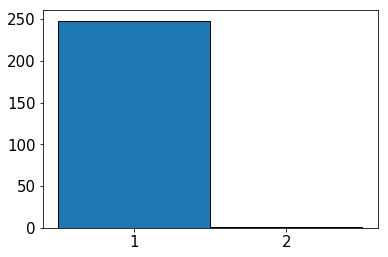

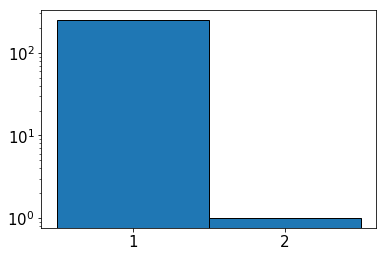

In [17]:
count_hist('253barklem_xmatch.dat')

In [18]:
test=open('253barklem_xmatch.dat','r')
lines=test.readlines()

for i in range(np.size(lines)-1):
    if lines[i][51:63] in lines[i+1]:
        print('Double assignment at line',i)
        print('Name of object:',lines[i][51:63])

Double assignment at line 223
Name of object: HE 2242-1930


In [19]:
# after checking with the assignments of the 20271 stars, it's clear that
# the second assignment in line 224 is the wrong one to be removed

write=open('253barklem_xmatch_doubleremoved.dat','w')
for i in range(np.size(lines)):
    if i == 224:
        pass
    else:
        write.write(lines[i])
        
write.close()

csv=open('253barklem_xmatch.csv','r')
lines1=csv.readlines()


write=open('253barklem_xmatch_doubleremoved.csv','w')
for i in range(np.size(lines1)):
    if i == 224:
        pass
    else:
        write.write(lines1[i])
        
write.close()

In [20]:
corr=open('253barklem_xmatch_doubleremoved.dat')
lines2=corr.readlines()

zuordnung=open('zuordnung253.dat','w')
for i in range(np.size(lines2)):
    zuordnung.write(str(lines2[i][51:63])+'    '+str(lines2[i][253:272])+'\n')
    
zuordnung.close()

In [21]:
from astropy.io import ascii
test_input = '253barklem_xmatch_doubleremoved.csv'
text_file = ascii.read(test_input)
text_file.write('253barklem_xmatch_doubleremoved.fits')

In [22]:
y=0
f=open('gaia_data_253_test','r')   # Überprüfung der Zuordnung Gaia-Gaia in topcat
for line in f:
    if line[24:43] in line[2:21]:
        y=y+1
        
print('Es sind '+str(y)+'/'+str(249)+' Objekte mit gleicher source_id.')

Es sind 249/249 Objekte mit gleicher source_id.


## Benchmark stars from Jofre et al. (2018)

Total number of lines:  26
Crossmatch with 1 result: 24 objects
Crossmatch with 2 results: 1 objects
Crossmatch with 3 results: 0 objects
Crossmatch with 4 results: 0 objects
Crossmatch with 5 results: 0 objects


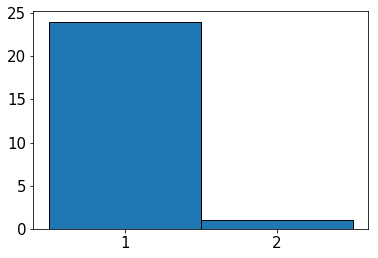

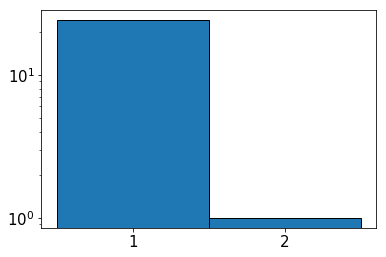

In [23]:
count_hist('benchmark_xmatch.dat')

In [24]:
from astropy.io import ascii
test_input = 'benchmark_xmatch.csv'
text_file = ascii.read(test_input)
text_file.write('benchmark_xmatch.fits')

## 1857 stars from Beers et al. (2007)

Total number of lines:  1504
Crossmatch with 1 result: 1436 objects
Crossmatch with 2 results: 34 objects
Crossmatch with 3 results: 0 objects
Crossmatch with 4 results: 0 objects
Crossmatch with 5 results: 0 objects


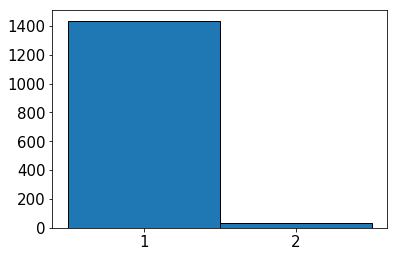

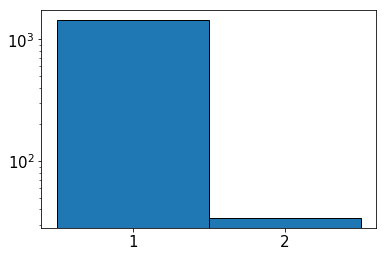

In [25]:
def count_hist_beers(x):
    aa=0
    a=0
    b=0
    c=0
    d=0

    file = open(x,'r')
    lines = file.readlines()
    num = np.size(lines)         # for the total number of lines

    with open(x,'a') as f:
        f.write('\n\n\n\n\n\n')  # add a few blank lines at the end so i+[integer] is not out of range

    file = open(x,'r')
    lines = file.readlines()     # read lines in list

    for i in range(1,num):         # loop over all lines, from 1 because of header line
                                 # see if HE XXXX-XXXX is also in the following line; additional condition because 3 to 1 would also count as 2 to 1 otherwise
        if (lines[i][70:82] not in lines[i+1]) and (lines[i][70:82] not in lines[i-1]):
            aa=aa+1
        if (lines[i][70:82] in lines[i+1]) and (lines[i][70:82] not in lines[i+2][70:82]) and (lines[i][70:82] not in lines[i-1]):
            a=a+1
        if (lines[i][70:82] in lines[i+1]) and (lines[i][70:82] in lines[i+2]): # this condition is enough because there's no objects where 4 or more Gaia objects have been assigned
            b=b+1
        if (lines[i][70:82] in lines[i+1]) and (lines[i][70:82] in lines[i+2]) and (lines[i][70:82] in lines[i+3]):
            c=c+1
        if (lines[i][70:82] in lines[i+1]) and (lines[i][70:82] in lines[i+2]) and (lines[i][70:82] in lines[i+3]) and (lines[i][70:82] in lines[i+4]):
            d=d+1

    print('Total number of lines: ',num-1)     # -1 because of header line
    print('Crossmatch with 1 result: '+str(aa)+' objects')
    print('Crossmatch with 2 results: '+str(a)+' objects')
    print('Crossmatch with 3 results: '+str(b)+' objects')
    print('Crossmatch with 4 results: '+str(c)+' objects')
    print('Crossmatch with 5 results: '+str(d)+' objects')

    f = open(x,'r')
    lines1 = f.readlines()

    f = open(x,'w')
    for i in range(num):
        f.write(lines1[i])            # remove blank lines by overwriting the file with the same content, but only up to the number of lines initially counted
    f.close()
    
    
    x=np.ones(aa)                     # the number of objects that are assigned to 1,2,3,... Gaia objects are put into arrays
    y=np.ones(a)*2
    z=np.ones(b)*3
    zz=np.ones(c)*4

    bins=np.append(x,np.append(y,np.append(z,zz)))    # one array to contain them all
    
    if c==d==0 and a!=0 and b!=0:
        fig1=plt.hist(bins,3,edgecolor='black')
        plt.xticks([4/3,2,8/3],['1','2','3'],size=15)
        plt.yticks(size=15)
        plt.show()

        fig2=plt.hist(bins,3,edgecolor='black')
        plt.xticks([4/3,2,8/3],['1','2','3'],size=15)
        plt.yticks(size=15)
        plt.yscale('log')
        plt.show()
        
    if c==d==b==0 and a!=0:
        fig1=plt.hist(bins,2,edgecolor='black')
        plt.xticks([1.25,1.75],['1','2'],size=15)
        plt.yticks(size=15)
        plt.show()

        fig2=plt.hist(bins,2,edgecolor='black')
        plt.xticks([1.25,1.75],['1','2'],size=15)
        plt.yticks(size=15)
        plt.yscale('log')
        plt.show()
        
    if c==d==b==a==0:
        fig1=plt.hist(bins,1,edgecolor='black')
        plt.xticks([1],['1'],size=15)
        plt.yticks(size=15)
        plt.show()

        fig2=plt.hist(bins,1,edgecolor='black')
        plt.xticks([1],['1'],size=15)
        plt.yticks(size=15)
        plt.yscale('log')
        plt.show()
    
count_hist_beers('beers_stars_xmatch.dat')

In [26]:
t=np.transpose(np.genfromtxt('beers_stars_xmatch.csv',skip_header=1,skip_footer=0,delimiter=','))

Vmag = t[8]                # Johnson B magnitude in mag
bp_rp = t[69]               # BP-RP colour index in mag
g = t[62]                   # G magnitude in mag
B_V = t[12]               # Johnson B-V colour, dereddened
E_B_V = t[32]               # colour excess
B_V_0 = B_V - E_B_V         # Johnson B-V colour

B_V_gaia = np.array([])     
V_gaia = np.array([])

for i in range(np.size(t[0])):            # the formulas for the conversion used here are explained in the lab book
    if np.isnan(bp_rp[i]) == False:
        u=0.001768
        v=0.2297
        w=0.02385
        x=0.0147-0.00686*bp_rp[i]-0.1732*bp_rp[i]**2

        coeff=[u,v,w,x]
        y=np.roots(coeff)
        B_V_gaia = np.append(B_V_gaia,y[2])

        v = g[i]+0.0176+0.00686*bp_rp[i]+0.1732*bp_rp[i]**2
        V_gaia= np.append(V_gaia,v)
    else:
        B_V_gaia = np.append(B_V_gaia,np.nan)
        V_gaia = np.append(V_gaia,np.nan)
        
B_V_gaia = np.real(B_V_gaia)
V_gaia = np.real(V_gaia)

In [27]:
l=0
for i in range(np.size(V_gaia)):          # check how many lines in bp_rp (and thus B_gaia, B_V_gaia) are NaN
    if np.isnan(bp_rp[i]) == True:
        l=l+1
        
print('Number of NaN lines:',l)


n=0
for i in range(np.size(B_V_0)):
    if B_V[i]-0.3 < B_V_gaia[i] and B_V[i]+0.3 > B_V_gaia[i] and Vmag[i]-0.6 < V_gaia[i] and Vmag[i]+0.6 > V_gaia[i]:
        n=n+1
    else:                                 # check how many Gaia objects are within a 3sigma range of the given B, B-V
        pass

arr3=np.array([])
for i in range(np.size(B_V_0)):
    if not (B_V[i]-0.3 < B_V_gaia[i] and B_V[i]+0.3 > B_V_gaia[i] and Vmag[i]-0.6 < V_gaia[i] and Vmag[i]+0.6 > V_gaia[i]):
        arr3=np.append(arr3,i)
    else:                                 # add the indices of the lines to this array to delete them later
        pass
    
arr3=arr3.astype('int')

print('Number of lines that are left:',n)

Number of NaN lines: 18
Number of lines that are left: 1351


Total number of lines:  1351
Crossmatch with 1 result: 1349 objects
Crossmatch with 2 results: 1 objects
Crossmatch with 3 results: 0 objects
Crossmatch with 4 results: 0 objects
Crossmatch with 5 results: 0 objects


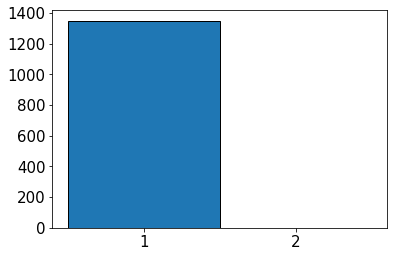

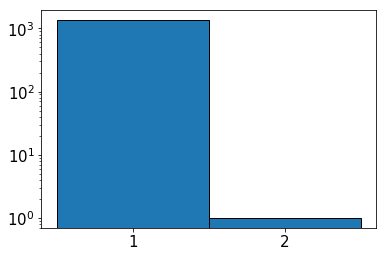

The index of the double is in the vicinity of 1269


In [28]:
file = open('beers_stars_xmatch.dat','r')
lines = file.readlines()
num = np.size(lines)

newfile = open('beers_plausibility_checked.dat','w')
for i in range(num):
    if i-1 in arr3:                    # write only lines where condition was fulfilled
        pass
    else:
        newfile.write(lines[i])
    
newfile.close()


file1 = open('beers_stars_xmatch.csv','r')    # dame thing for .csv
lines1 = file1.readlines()
num1 = np.size(lines1)

newfile1 = open('beers_plausibility_checked.csv','w')
for i in range(num1):
    if i-1 in arr3:                    # write only lines where condition was fulfilled
        pass
    else:
        newfile1.write(lines1[i])
    
newfile1.close()

count_hist_beers('beers_plausibility_checked.dat')

file = open('beers_plausibility_checked.dat','r')
lines = file.readlines()     # read lines in list

for i in range(1,1350):         # loop over all lines, from 1 because of header line
                             # see if HE XXXX-XXXX is also in the following line; additional condition because 3 to 1 would also count as 2 to 1 otherwise
    if (lines[i][70:82] in lines[i+1]) and (lines[i][70:82] not in lines[i+2][70:82]) and (lines[i][70:82] not in lines[i-1]):
        print('The index of the double is in the vicinity of',i)
        
        
# after checking, it turns out it's not a double, so all 1351 stars are unique

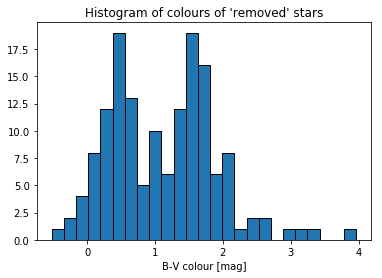

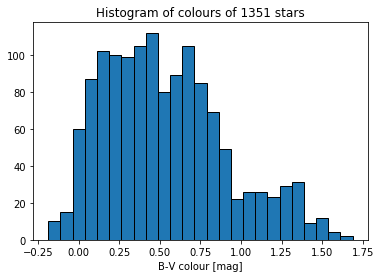

In [29]:
# statistical properties of removed stars

col_rem=np.array([])                          # B-V colours of HES not in 18095 chosen stars
for i in arr3:
    col_rem=np.append(col_rem,B_V[i])
    
col_stay=np.array([])
for i in range(np.size(Vmag)):
    if i not in arr3:
        col_stay=np.append(col_stay,B_V[i])
    else:
        pass
    
    
hist1=plt.figure()
plt.hist(col_rem,25,edgecolor='black')
plt.title('Histogram of colours of \'removed\' stars')
plt.xlabel('B-V colour [mag]')
plt.show()

hist2=plt.figure()
plt.hist(col_stay,25,edgecolor='black')
plt.title('Histogram of colours of 1351 stars')
plt.xlabel('B-V colour [mag]')
plt.show()

In [30]:
from astropy.io import ascii
test_input = 'beers_plausibility_checked.csv'
text_file = ascii.read(test_input)
text_file.write('beers_plausibility_checked.fits')

In [31]:
z=0
f=open('beers_gaia_data_test','r')   # Überprüfung der Zuordnung Gaia-Gaia in topcat
for line in f:
    if line[24:43] in line[2:21]:
        z=z+1
        
print('Es sind '+str(z)+'/'+str(1351)+' Objekte mit gleicher source_id.')

Es sind 1351/1351 Objekte mit gleicher source_id.


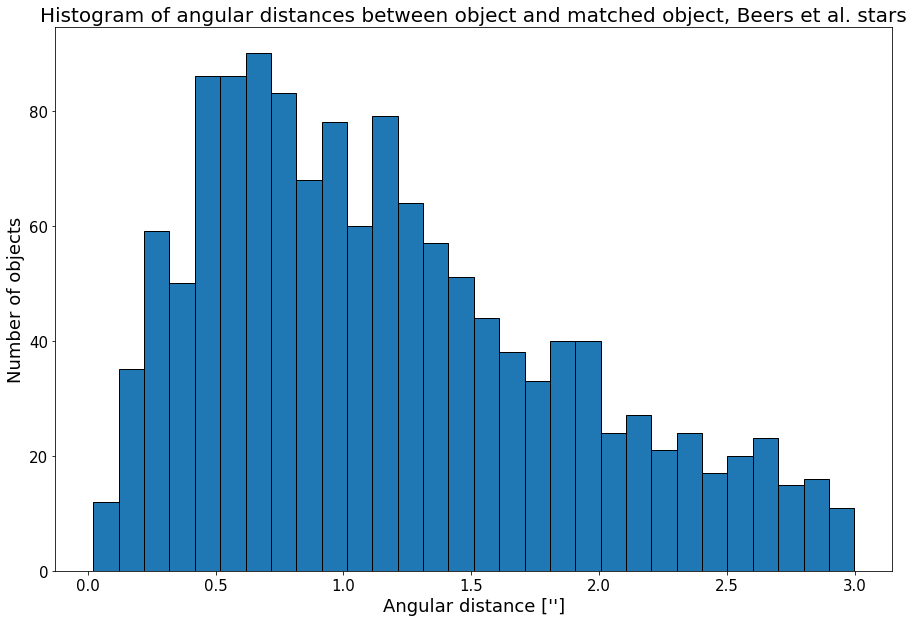

In [32]:
# histogram of the distances between object and matched object

dist = np.genfromtxt('beers_plausibility_checked.csv',skip_header=1,delimiter=',',usecols=0)

plt.figure(figsize=(15,10))
plt.hist(dist,30,edgecolor='black')
plt.xticks(size=15)
plt.yticks(size=15)
plt.title('Histogram of angular distances between object and matched object, Beers et al. stars',size=20)
plt.xlabel('Angular distance [\'\']',size=18)
plt.ylabel('Number of objects',size=18)
plt.savefig('Abbildungen/beers_angular_dist_crossmatch.png')